**Moving Average (MA)**

---





The moving average is one of the most widely used technical indicators. It is used along with other technical indicators or it can form the building block for the computation of other technical indicators.

A “moving average” is the average of the asset prices over the “x” number of days/weeks. The term “moving” is used because the group of data moves forward with each new trading day. For each new day, we include the price of that day and exclude the price of the first day in the data sequence.

The most commonly used moving averages are the 5-day, 10-day, 20-day, 50-day, and the 200-day moving averages.

**Estimation**

There are different types of moving averages used for analysis, a simple moving average (SMA), weighted moving average (WMA), and the exponential Moving average (EMA).

To compute a 20-day SMA, we take the sum of prices over 20 days and divide it by 20. To arrive at the next data point for the 20-day SMA, we include the price of the next trading day while excluding the price of the first trading day. This way the group of data moves forward.

The SMA assigns equal weights to each price point in the group. When we compute a 20-day WMA, we assign varying weights to each price points. The latest price, i.e. the 20th-day price gets the highest weightage, while the first price gets the lowest weightage. This sum is then divided by the sum of the weights used.

To compute the 20-day EMA, we first compute the very first EMA value using a simple moving average. Then we calculate the multiplier, and thereafter to compute the second EMA value we use the multiplier and the previous day EMA. This formula is used to compute the subsequent EMA values.

**SMA**       : 20 period sum / 20

**Multiplier** : (2 / (Time periods + 1)) = (2 / (20 + 1)) = 9.52%

**EMA**      : {Close price - EMA(previous day)} x multiplier + EMA(previous day).

**Analysis**





---



The moving average tells whether a trend has begun, ended or reversed. The averaging of the prices produces a smoother line which makes it easier to identify the underlying trend. However, the moving average lags the market action.

A shorter moving average is more sensitive than a longer moving average. However, it is prone to generate false trading signals.

**Using a single Moving Average** – A single moving average can be used to generate trade signals. When the closing price moves above the moving average, a buy signal is generated and vice versa. When using a single moving average one should select the averaging period in such a way that it is sensitive in generating trading signals and at the same time insensitive in giving out false signals.

**Using two Moving Averages** – Using a single moving average can be disadvantageous. Hence many traders use two moving averages to generate signals. In this case, a buy signal is generated when the shorter average crosses above the longer average. Similarly, a sell is generated when the shorter crosses below the longer average. Using two moving averages reduces the false signals which are more likely when using a single moving average.

Traders also use three moving averages, like the 5, 10, and 20-day moving average system widely used in the commodity markets.

**Python code for computing Moving Averages for NIFTY**

In the code below we use the Series, rolling mean, and the join functions to create the SMA and the EWMA functions. The Series function is used to form a series which is a one-dimensional array-like object containing an array of data. The rolling_mean function takes a time series or a data frame along with the number of periods and computes the mean. The join function joins a given series with a specified series/dataframe.

In [ ]:
pip install yfinance  # installing relevant library

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

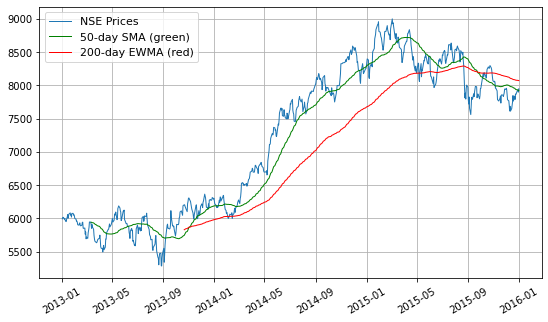

In [4]:
# Moving Averages Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance
import pandas as pd

# Simple Moving Average 
def SMA(data, ndays): 
 SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
 data = data.join(SMA) 
 return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
 EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
 data = data.join(EMA) 
 return data

# Retrieve the Nifty data from Yahoo finance:
data = pdr.get_data_yahoo("^NSEI", start="2013-01-01", end="2016-01-01") 
data = pd.DataFrame(data) 
close = data['Close']

# Compute the 50-day SMA for NIFTY
n = 50
SMA_NIFTY = SMA(data,n)
SMA_NIFTY = SMA_NIFTY.dropna()
SMA = SMA_NIFTY['SMA']

# Compute the 200-day EWMA for NIFTY
ew = 200
EWMA_NIFTY = EWMA(data,ew)
EWMA_NIFTY = EWMA_NIFTY.dropna()
EWMA = EWMA_NIFTY['EWMA_200']

# Plotting the NIFTY Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(data['Close'],lw=1, label='NSE Prices')
plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA,'r', lw=1, label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)